<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/hccho2/DL-UPMTP/blob/master/DL-TF-TORCH-CH4-Data-Model.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 다시 시작해야 함.

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarunGothic')

# 4.1 데이터 불러오기

## 4.1.1 MNIST 데이터
- http://yann.lecun.com/exdb/mnist/  
- 또는 https://web.archive.org/web/20220331130319/https://yann.lecun.com/exdb/mnist/ 에서 다운로드 받을 수 있다.
- 또는 아래 download_mnist()를 실행하면 된다.

In [ ]:
import gzip
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import os
from PIL import Image

In [ ]:
mnist = {
    'train_img':'train-images-idx3-ubyte.gz',
    'train_label':'train-labels-idx1-ubyte.gz',
    'test_img':'t10k-images-idx3-ubyte.gz',
    'test_label':'t10k-labels-idx1-ubyte.gz'
}
mnist.values()

dict_values(['train-images-idx3-ubyte.gz', 'train-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz', 't10k-labels-idx1-ubyte.gz'])

In [ ]:
def download_mnist():
    mnist_url = 'http://yann.lecun.com/exdb/mnist/'
    mnist = {
        'train_img':'train-images-idx3-ubyte.gz',
        'train_label':'train-labels-idx1-ubyte.gz',
        'test_img':'t10k-images-idx3-ubyte.gz',
        'test_label':'t10k-labels-idx1-ubyte.gz'
    }

    for gz_filename in mnist.values():
        file_path = os.path.join('./',gz_filename)  # 다운 받을 위치
        if not os.path.exists(file_path):
            urllib.request.urlretrieve(mnist_url + gz_filename, file_path)
            print(f"Downloading: {file_path}")
    print("Done")

In [ ]:
download_mnist()

Downloading: ./train-images-idx3-ubyte.gz
Downloading: ./train-labels-idx1-ubyte.gz
Downloading: ./t10k-images-idx3-ubyte.gz
Downloading: ./t10k-labels-idx1-ubyte.gz
Done


압축 풀고 로드하기

In [ ]:
def extract_mnist(img_filename,image_flag):
    offset=16 if image_flag else 8

    with gzip.open(img_filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=offset) # numpy array, uint8, flatten array
    if image_flag:
        data = data.reshape(-1,784)
    return data
def load_mnist(datadir):
    mnist = {
        'train_img':'train-images-idx3-ubyte.gz',
        'train_label':'train-labels-idx1-ubyte.gz',
        'test_img':'t10k-images-idx3-ubyte.gz',
        'test_label':'t10k-labels-idx1-ubyte.gz'
    }

    train_X = extract_mnist(os.path.join(datadir,mnist['train_img']),image_flag=True)
    train_Y = extract_mnist(os.path.join(datadir,mnist['train_label']),image_flag=False)
    test_X = extract_mnist(os.path.join(datadir,mnist['test_img']),image_flag=True)
    test_Y = extract_mnist(os.path.join(datadir,mnist['test_label']),image_flag=False)

    return train_X, train_Y, test_X, test_Y

In [ ]:
train_X, train_Y, test_X, test_Y = load_mnist('./')

In [ ]:
print(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)
print(train_X.dtype, train_Y.dtype, test_X.dtype, test_Y.dtype)

(60000, 784) (60000,) (10000, 784) (10000,)
uint8 uint8 uint8 uint8


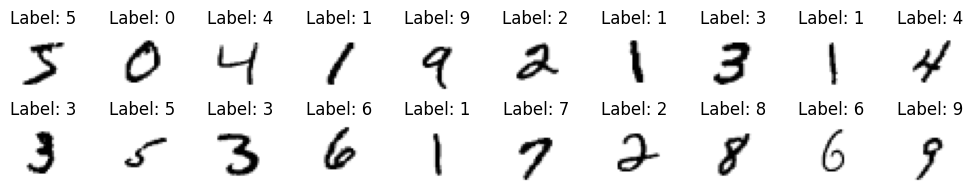

In [ ]:
num_rows = 2
num_cols = 10
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols,num_rows))
for i in range(num_rows*num_cols):
    ax = axes[i//num_cols, i%num_cols]
    ax.imshow(train_X[i].reshape(28,28), cmap='gray_r')
    ax.set_title('Label: {}'.format(train_Y[i]))
    ax.axis('off')
plt.tight_layout()
plt.savefig('mnist_samples.png')

cmap = 'gray' vs 'gray_r' vs 'binary'

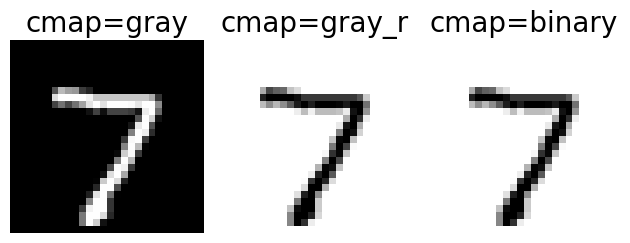

In [ ]:
plt.subplot(1,3,1)
plt.imshow(test_X[0].reshape(28,28),cmap='gray')
plt.axis('off')
plt.title('cmap=gray',fontsize=20)

plt.subplot(1,3,2)
plt.imshow(test_X[0].reshape(28,28),cmap='gray_r')
plt.axis('off')
plt.title('cmap=gray_r',fontsize=20)

plt.subplot(1,3,3)
plt.imshow(test_X[0].reshape(28,28),cmap='binary')
plt.axis('off')
plt.title('cmap=binary',fontsize=20)

plt.tight_layout()

## 4.1.2 MNIST 데이터 - Tensorflow
- tf.keras.datasets.mnist.load_data()  --> numpy array
- ~/.keras/datasets
- (60000,28,28),(60000,), (10000,28,28), (10000,)
- unit8, 0~255

==========================

* 4.1.2
* 4.1.6,
* 4.2.7

세개 절이 연결된다.

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()  # numpy array
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(x_train.dtype, y_train.dtype, x_test.dtype, y_test.dtype)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
uint8 uint8 uint8 uint8


[5 0 4 1 9 2 1 3 1 4]


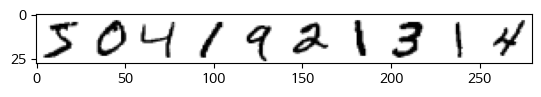

In [ ]:
print(y_train[:10])
plt.imshow(np.hstack(x_train[:10]),cmap='gray_r')
#plt.imshow(np.transpose(x_train[:10],(1,0,2)).reshape(28,-1),cmap='binary')

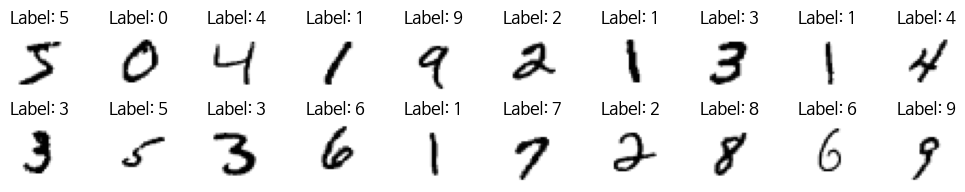

In [ ]:
num_rows = 2
num_cols = 10
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols,num_rows))
for i in range(num_rows*num_cols):
    ax = axes[i//num_cols, i%num_cols]
    ax.imshow(x_train[i], cmap='gray_r')
    ax.set_title('Label: {}'.format(y_train[i]))
    ax.axis('off')
plt.tight_layout()
plt.show()

## 4.1.6 Tensorflow 데이터 처리

In [ ]:
x_train = tf.cast(x_train.reshape(-1,28*28)/255.,tf.float32)
x_test = tf.cast(x_test.reshape(-1,28*28)/255.,tf.float32)

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train,y_train)).shuffle(2000).batch(32)
validation_dataset = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(64)

method=1
if method==1:
    for i,d in enumerate(train_dataset.take(4)):
        print(i, d[0].shape, d[1].shape)
else:
    for i,d in enumerate(train_dataset):
        print(i, d[0].shape, d[1].shape)
        if i>=3: break

0 (32, 784) (32,)
1 (32, 784) (32,)
2 (32, 784) (32,)
3 (32, 784) (32,)


In [ ]:
isinstance(train_dataset, tf.data.Dataset)

True

## 4.2.7 모델 구현 - Tensorflow

In [ ]:
print("GPU: ", tf.config.list_physical_devices('GPU'))
np.random.seed(100); tf.random.set_seed(100)
model = tf.keras.Sequential([tf.keras.layers.Dense(512,activation='relu'),tf.keras.layers.Dense(10,activation=None)])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer,loss=loss_fn,metrics=['accuracy'])

GPU:  []


In [ ]:
print(tf.test.is_gpu_available())
history = model.fit(train_dataset, epochs=6,verbose=1,validation_data=validation_dataset,validation_freq=2)

False
Epoch 1/6
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1964 - accuracy: 0.9428
Epoch 2/6
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0798 - accuracy: 0.9753 - val_loss: 0.0820 - val_accuracy: 0.9740
Epoch 3/6
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0519 - accuracy: 0.9840
Epoch 4/6
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0356 - accuracy: 0.9885 - val_loss: 0.0684 - val_accuracy: 0.9789
Epoch 5/6
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0256 - accuracy: 0.9913
Epoch 6/6
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0175 - accuracy: 0.9943 - val_loss: 0.0895 - val_accuracy: 0.9752


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

10 epoch 훈련

In [ ]:
print("GPU: ", tf.config.list_physical_devices('GPU'))
np.random.seed(100); tf.random.set_seed(100)
model = tf.keras.Sequential([tf.keras.layers.Dense(512,activation='relu'),tf.keras.layers.Dense(10,activation=None)])
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer,loss=loss_fn,metrics=['accuracy'])
history = model.fit(train_dataset, epochs=10,verbose=1,validation_data=validation_dataset,validation_freq=1)

GPU:  []
Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2015 - accuracy: 0.9398 - val_loss: 0.1062 - val_accuracy: 0.9677
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0800 - accuracy: 0.9754 - val_loss: 0.0817 - val_accuracy: 0.9737
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0517 - accuracy: 0.9839 - val_loss: 0.0760 - val_accuracy: 0.9779
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0365 - accuracy: 0.9884 - val_loss: 0.0691 - val_accuracy: 0.9784
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0252 - accuracy: 0.9921 - val_loss: 0.0793 - val_accuracy: 0.9762
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0196 - accuracy: 0.9935 - val_loss: 0.0818 - val_accuracy: 0.9790
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0169 - accuracy: 0.9944 - val_loss: 0.0749

Text(0.5, 0.98, 'MNiST - Tensorflow')

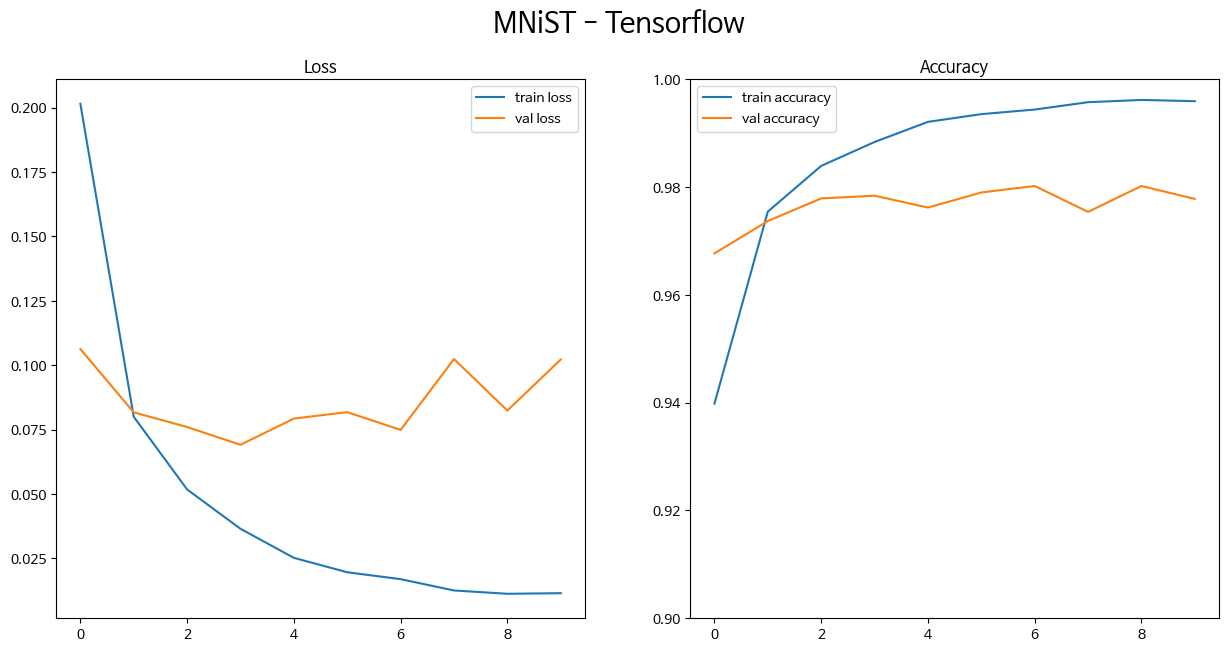

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.title('Loss')

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.ylim([0.9,1])
plt.legend()
plt.title('Accuracy')

plt.suptitle('MNiST - Tensorflow',fontsize=20)

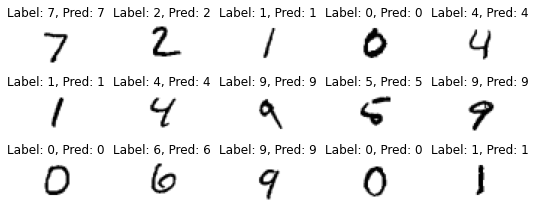

In [ ]:
num_rows = 3
num_cols = 5
n = num_rows*num_cols
test_data, test_data_label = x_test[:n],y_test[:n]
pred_label = tf.argmax(model.predict(test_data),axis=-1).numpy()

fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*1.5,num_rows))
for i in range(num_rows*num_cols):
    ax = axes[i//num_cols, i%num_cols]
    ax.imshow(test_data[i].numpy().reshape(28,28), cmap='gray_r')
    ax.set_title(f'Label: {test_data_label[i]}, Pred: {pred_label[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
tf.argmax(model(test_data),axis=-1).numpy()

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4])

## 4.1.3 MNIST 데이터 - Pytorch


==========================
* 4.1.3
* 4.2.8
* 4.2.9,

세개 절이 연결된다.

In [ ]:
import torchvision.datasets as datasets
from torch.utils.data import DataLoader, Dataset
import torchvision.transforms as transforms
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
import time
import torch

In [ ]:
# transform을 넣지 않으면, PIL.Image를 return한다.
download_root = '.'
train_dataset = datasets.MNIST(download_root, transform=None, train=True, download=True)
test_dataset = datasets.MNIST(download_root, transform=None, train=False, download=True)

In [ ]:
it = iter(train_dataset)
d = next(it)

In [ ]:
d[1]

5

## 4.2.8 Pytorch 데이터 처리


In [ ]:
# transform으로 변환.
download_root = '.'
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = datasets.MNIST(download_root, transform=transform, train=True, download=True)   # transform을 넣어야 한다.  ---> float32, int64(int32이면 nn.CrossEntropyLoss에 못 넘긴다.)
test_dataset = datasets.MNIST(download_root, transform=transform, train=False, download=True)

#test_dataset = datasets.MNIST(download_root, transform=transforms.ToTensor(), train=False, download=True)  # 직접 넘겨도 된다.

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=32,shuffle=True,drop_last=False)
test_dataloader = DataLoader(test_dataset, batch_size=128,shuffle=False,drop_last=False)

In [ ]:
it = iter(train_dataloader)
dd = next(it)
dd[0].shape, dd[1].shape, dd[0].dtype, dd[1].dtype

(torch.Size([32, 1, 28, 28]), torch.Size([32]), torch.float32, torch.int64)

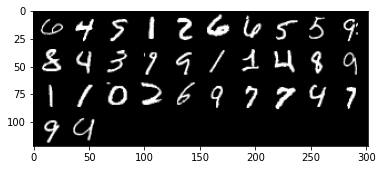

In [ ]:
#plt.imshow(np.transpose(make_grid(dd[0]).numpy(), (1, 2, 0)))

plt.imshow(np.transpose(make_grid(dd[0],nrow=10).numpy(), (1, 2, 0)))

In [ ]:
np.transpose(make_grid(dd[0]).numpy(), (1, 2, 0)).shape

(62, 242, 3)

## 4.2.9 모델 구현 - Pytorch

In [ ]:
def torch_reset_seed(seed=100):
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)


seed = 100
np.random.seed(seed);
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("device: ", device)
torch_reset_seed(seed)

model = torch.nn.Sequential(
        torch.nn.Linear(784,512),
        torch.nn.ReLU(),
        torch.nn.Linear(512,10))  # No Softmax

deive:  cpu


In [ ]:
model[0].weight.device

device(type='cpu')

In [ ]:
n_epochs= 10

loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
model.to(device)  # optimizer에 넘겨주기 전/후 위치에 상관 없다.

Sequential(
  (0): Linear(in_features=784, out_features=512, bias=True)
  (1): ReLU()
  (2): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
s_time = time.time()

for epoch in range(n_epochs):  # loop over the dataset multiple times

    running_loss = []
    acc = 0
    total = 0
    model.train()
    for i, data in enumerate(train_dataloader):
        # get the inputs
        inputs, labels = data
        inputs = inputs.reshape(-1,28*28).to(device)  #(N,784)
        labels = labels.to(device)  # (N,)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        optimizer.step()

        _, pred = outputs.max(axis=-1)
        acc  += (pred==labels).float().sum().item()
        total += len(labels)


        # print statistics
        running_loss.append(loss.item())
    print(f'[epoch: {epoch+1}] loss: {np.mean(running_loss):.4f}, train acc: {acc/total:.4f} elapsed: {time.time()-s_time:.2f}sec\t',end='')

    acc = 0
    total=0
    model.eval()
    with torch.no_grad():
        for i, data in enumerate(test_dataloader):
            inputs, labels = data
            inputs = inputs.reshape(-1,28*28).to(device)
            outputs = model(inputs)

            _, pred = outputs.max(axis=-1)
            acc  += (pred.cpu()==labels).float().sum().item()
            total += len(labels)
        print(f'test acc: {acc/total:.4f}')

print('Finished Training')

[epoch: 1] loss: 0.2206, train acc: 0.9359 elapsed: 17.16sec	test acc: 0.9635
[epoch: 2] loss: 0.0860, train acc: 0.9739 elapsed: 37.13sec	test acc: 0.9752
[epoch: 3] loss: 0.0551, train acc: 0.9830 elapsed: 57.38sec	test acc: 0.9792
[epoch: 4] loss: 0.0394, train acc: 0.9877 elapsed: 80.59sec	test acc: 0.9769
[epoch: 5] loss: 0.0285, train acc: 0.9909 elapsed: 101.52sec	test acc: 0.9787
[epoch: 6] loss: 0.0210, train acc: 0.9931 elapsed: 122.56sec	test acc: 0.9809
[epoch: 7] loss: 0.0188, train acc: 0.9938 elapsed: 143.41sec	test acc: 0.9755
[epoch: 8] loss: 0.0150, train acc: 0.9949 elapsed: 164.74sec	test acc: 0.9811
[epoch: 9] loss: 0.0117, train acc: 0.9962 elapsed: 186.05sec	test acc: 0.9805
[epoch: 10] loss: 0.0115, train acc: 0.9961 elapsed: 207.50sec	test acc: 0.9784
Finished Training


## 4.1.4 MNIST 데이터 - Scikit-Learn
- mnist['data'], mnist['target'] --> Pandas DataFrame, Series

In [ ]:
from sklearn.datasets import fetch_openml

In [ ]:
mnist = fetch_openml('mnist_784',version=1,data_home=r'./')

In [ ]:
type(mnist)

sklearn.utils.Bunch

In [ ]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
mnist['data'].values.shape

(70000, 784)

In [ ]:
type(mnist['target']), type(mnist['data'])

(pandas.core.series.Series, pandas.core.frame.DataFrame)

In [ ]:
type(mnist['target'][0]), mnist['target'][0]

(str, '5')

In [ ]:
mnist['target'].dtype

CategoricalDtype(categories=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], ordered=False)

# 4.2 MNIST 분류 모델

## 4.2.1 분류 모델과 Softmax

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import torch

In [ ]:
def softmax(x):
    y = np.exp(x - np.max(x))
    return y / y.sum(axis=-1,keepdims=True)

In [ ]:
x = np.random.randn(4)
softmax(x)

array([0.04545114, 0.38552758, 0.25233635, 0.31668494])

In [ ]:
x = np.random.randn(3,4)  # (batch_size, D)
softmax(x)

array([[0.6158958 , 0.0241718 , 0.06239892, 0.29753347],
       [0.00573159, 0.01578551, 0.93126026, 0.04722264],
       [0.14397022, 0.05194033, 0.20035551, 0.60373394]])

## 4.2.3 One-Hot & Cross Entropy API

One-Hot Encoding

In [ ]:
labels = np.array([0, 9, 7, 9, 8]) # np.random.randint(10,size=(5,))

In [ ]:
tf.one_hot(labels,10)

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)>

In [ ]:
torch.nn.functional.one_hot(torch.LongTensor(labels),10)

tensor([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]])

Cross Entropy Loss

In [ ]:
# Cross Entropy Loss
batch_size=3;D=4
labels = [2,3,0]
logits = np.array([[ 1.50, -0.99, -0.04,  0.43],
                   [ 0.76, -0.04, -0.81,  1.34],
                   [ 1.15,  0.61,  0.10,  0.22]])
preds = softmax(logits)
preds

array([[0.60964473, 0.05054562, 0.13069631, 0.20911334],
       [0.29040958, 0.13048944, 0.06041831, 0.51868267],
       [0.4296936 , 0.25040319, 0.15036601, 0.1695372 ]])

In [ ]:
L = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
L2 = tf.nn.sparse_softmax_cross_entropy_with_logits
L(labels,logits).numpy(), tf.reduce_mean(L2(labels,logits)).numpy()

(1.1786749362945557, 1.1786749331262152)

In [ ]:
A = tf.convert_to_tensor(preds)
-tf.math.log((tf.gather(A,labels,axis=1, batch_dims=1))).numpy().mean()

1.1786749331262152

In [ ]:
LL = torch.nn.CrossEntropyLoss()
LL(torch.tensor(logits),torch.tensor(labels)).item()

1.1786749331262152

In [ ]:
# Pytorch 직접 계산
B = torch.tensor(preds)
-B[range(batch_size),labels].log().mean().item()

1.1786749331262152

In [ ]:
-np.log(preds[range(batch_size),labels]).mean()

1.1786749331262152

In [ ]:
-(np.log(0.13069631)+np.log(0.51868267)+np.log(0.4296936))/3

1.1786749274668784

Advanced Indexing

In [ ]:
preds[range(batch_size),labels]

array([0.13069631, 0.51868267, 0.4296936 ])

## 4.3.1 Tensorflow 사용자 정의 모델 - class

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
class MyModel(tf.keras.Model):
    def __init__(self,**kwargs):
        super(MyModel, self).__init__(**kwargs)

        self.L1 = tf.keras.layers.Dense(units=512,activation='relu',name='L1')
        self.L2 = tf.keras.layers.Dense(units=10,activation=None,name='L2')
    def call(self,x,training=None):
        output = self.L1(x)
        output = self.L2(output)
        return output

In [ ]:
model = MyModel()

method=2
if method==1:
    model.build((None,784))  # (batch_size, input_dim)
else:
    x = tf.random.normal((2,784))
    model(x)

model.summary()

Model: "my_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  multiple                  401920    
                                                                 
 L2 (Dense)                  multiple                  5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x = tf.random.normal((2,784))
model(x)

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[ 0.51938725, -1.8949202 , -0.16573429,  1.9097855 , -0.48164046,
         0.22363782, -1.1203139 , -0.09412134,  0.4806329 , -0.41715282],
       [-0.556985  , -0.91682863, -0.30259538,  2.1482778 , -2.7121978 ,
        -0.7488636 , -0.59606564, -0.7295522 ,  1.2655506 , -1.2136335 ]],
      dtype=float32)>

In [ ]:
model.summary()

Model: "my_model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  multiple                  401920    
                                                                 
 L2 (Dense)                  multiple                  5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.L1, model.L2

(<keras.layers.core.dense.Dense at 0x7f291091a490>,
 <keras.layers.core.dense.Dense at 0x7f29108b6c10>)

In [ ]:
model.get_layer('L1')

In [ ]:
class MyModel2(tf.keras.Model):
    def __init__(self,hidden_dim,n_class,**kwargs):
        super(MyModel2, self).__init__(**kwargs)

        self.L1 = tf.keras.layers.Dense(units=hidden_dim,activation='relu',name='L1')
        self.L2 = tf.keras.layers.Dense(units=n_class,activation=None,name='L2')
    def call(self,x,training=None):
        output = self.L1(x)
        output = self.L2(output)
        return output

In [ ]:
input_dim = 784; hidden_dim = 512; n_class = 10
model2 = MyModel2(hidden_dim,n_class)
model2.build((None,input_dim))

In [ ]:
model2.summary()

Model: "my_model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  multiple                  401920    
                                                                 
 L2 (Dense)                  multiple                  5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x = tf.random.normal((2,784))

In [ ]:
model2.fit

<bound method Model.fit of <__main__.MyModel2 object at 0x7f290c770a90>>

## 4.3.2 Tensorflow 사용자 정의 모델 - Functional API
- https://www.tensorflow.org/guide/keras/functional?hl=ko

In [ ]:
inputs = tf.keras.Input(shape=(784,))
outputs = tf.keras.layers.Dense(512, activation="relu")(inputs)
outputs = tf.keras.layers.Dense(10, activation=None)(outputs)
model3 = tf.keras.Model(inputs=inputs, outputs=outputs, name="MyModel3")

In [ ]:
model3.summary()

Model: "MyModel3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x = tf.random.normal((2,784))
model3(x)

<tf.Tensor: shape=(2, 10), dtype=float32, numpy=
array([[-0.4933665 , -0.3068246 , -1.8772671 ,  0.5334647 ,  0.02333431,
        -2.7546837 ,  0.8058663 , -1.9645491 , -0.37190446,  1.1283896 ],
       [-1.2976863 , -0.337906  , -0.78816915, -0.6202474 , -0.6156264 ,
        -0.40097022,  0.6610062 , -3.109075  , -0.90947235,  1.2136924 ]],
      dtype=float32)>

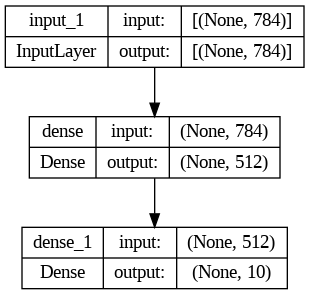

In [ ]:
tf.keras.utils.plot_model(model3, "model3.png", show_shapes=True)

In [ ]:
print("GPU available: ", tf.test.is_gpu_available())
np.random.seed(100); tf.random.set_seed(100)

input_dim = 784; hidden_dim = 128; n_class = 10
model2_a = MyModel2(hidden_dim,n_class,name='a')
model2_b = MyModel2(hidden_dim*2,n_class,name='b')
model2_c = MyModel2(hidden_dim*4,n_class,name='c')

inputs = tf.keras.Input(shape=(784,))
outputs_a = model2_a(inputs)
outputs_b = model2_b(inputs)
outputs_c = model2_c(inputs)
#outputs_sum =  outputs_a + outputs_b + outputs_c
outputs_sum = tf.keras.layers.add([outputs_a,outputs_b,outputs_c])
model = tf.keras.Model(inputs=inputs,outputs = outputs_sum)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer,loss=loss_fn,metrics=['accuracy'])

GPU available:  False


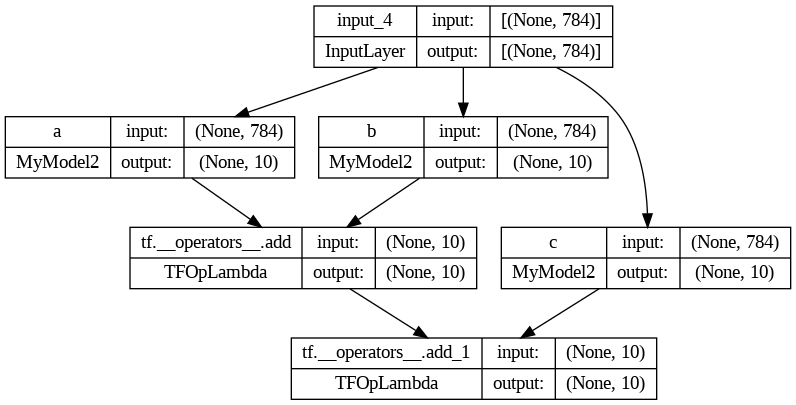

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [ ]:
# train_dataset은 위에서 정의한 MNIST 데이터셋
print(tf.test.is_gpu_available())
history = model.fit(train_dataset, epochs=10,verbose=1,validation_data=validation_dataset,validation_freq=1)

False
Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1806 - accuracy: 0.9452 - val_loss: 0.1141 - val_accuracy: 0.9632
Epoch 2/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0724 - accuracy: 0.9777 - val_loss: 0.0858 - val_accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0464 - accuracy: 0.9850 - val_loss: 0.0699 - val_accuracy: 0.9798
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0337 - accuracy: 0.9895 - val_loss: 0.0837 - val_accuracy: 0.9753
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0255 - accuracy: 0.9912 - val_loss: 0.0899 - val_accuracy: 0.9753
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0208 - accuracy: 0.9927 - val_loss: 0.0782 - val_accuracy: 0.9793
Epoch 7/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0179 - accuracy: 0.9939 - val_loss: 0.0875 - 

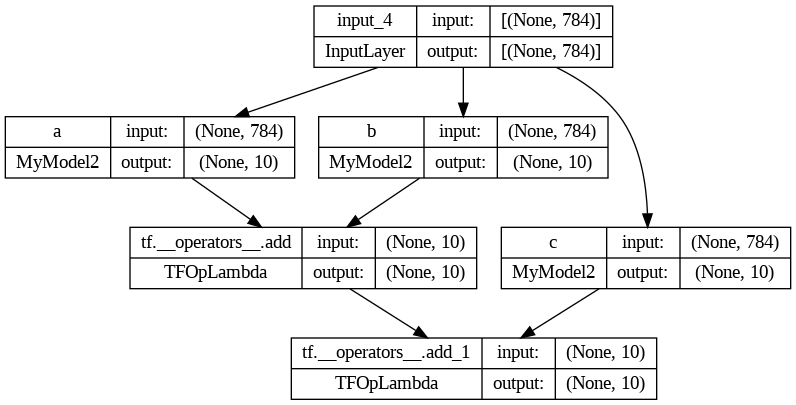

In [ ]:
tf.keras.utils.plot_model(model, "model_ensemble.png", show_shapes=True)  # 구조를 잘 그려주는 것 같지 않네...

## 4.3.3 Tensorflow 사용자 정의 Layer(User Defined Layer)

In [ ]:
class MyDense(tf.keras.layers.Layer):
    def __init__(self, num_outputs):
        super(MyDense, self).__init__()
        self.num_outputs = num_outputs

    def build(self, input_shape):
        self.kernel = self.add_weight("kernel", shape=[int(input_shape[-1]), self.num_outputs])
        self.bias = self.add_weight("bias", shape=[self.num_outputs])

    def call(self, inputs):
        return tf.matmul(inputs, self.kernel,name='xx') + self.bias

In [ ]:
my_layer = MyDense(5)

x = np.random.randn(2,3)

y = my_layer(x)
print(y)

tf.Tensor(
[[-0.74422604 -0.5614741   1.0669745  -1.4729064  -1.1011672 ]
 [-0.23283952  0.0660055   1.0316389  -1.3434981  -0.4871207 ]], shape=(2, 5), dtype=float32)


## 4.3.4 Pytorch 사용자 정의 모델

In [ ]:
import torch

In [ ]:
class MyModelPytorch(torch.nn.Module):
    def __init__(self,input_dim,hidden_dim,n_class):
        super(MyModelPytorch, self).__init__()

        self.L1 = torch.nn.Linear(input_dim,hidden_dim)
        self.activation = torch.nn.ReLU()
        self.L2 = torch.nn.Linear(hidden_dim,n_class)
    def forward(self,x):
        output = self.L1(x)
        output = self.activation(output)
        output = self.L2(output)
        return output

In [ ]:
input_dim = 784
hidden_dim = 512
n_class = 10

model = MyModelPytorch(input_dim,hidden_dim,n_class)
x = torch.randn(2,784)

In [ ]:
model(x)

tensor([[ 0.1094, -0.2233,  0.0355,  0.1203,  0.9054,  0.1742,  0.0662, -0.0630,
          0.2035, -0.0641],
        [ 0.7255, -0.1882,  0.4339, -0.1460,  0.3462,  0.2084,  0.1550, -0.0720,
          0.0441,  0.1943]], grad_fn=<AddmmBackward0>)

In [ ]:
model

MyModelPytorch(
  (L1): Linear(in_features=784, out_features=512, bias=True)
  (activation): ReLU()
  (L2): Linear(in_features=512, out_features=10, bias=True)
)

In [ ]:
model.L1

Linear(in_features=784, out_features=512, bias=True)

### IRIS Dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

import torch
from torch.utils.data import TensorDataset,DataLoader

import numpy as np
import time

In [ ]:
iris_dataset = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_dataset.data, iris_dataset.target,
                                    test_size=0.2, shuffle=True, stratify=iris_dataset.target, random_state=34)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [ ]:
X_train = torch.Tensor(x_train); Y_train = torch.LongTensor(y_train)
X_test = torch.Tensor(x_test); Y_test = torch.LongTensor(y_test)

train_dataset = TensorDataset(X_train,Y_train)
test_dataset = TensorDataset(X_test,Y_test)

In [ ]:
train_dataloader = DataLoader(train_dataset, batch_size=8,shuffle=True,drop_last=False)
test_dataloader = DataLoader(test_dataset, batch_size=30,shuffle=False,drop_last=False)

### 모델 훈련

In [ ]:
def train_pytorch_model(model,optimizer,loss_fn,train_dl, valid_dl,n_epochs,device):
    s_time = time.time()
    model.to(device)
    history = {'train_acc': [], 'val_acc': []}
    for epoch in range(n_epochs):  # loop over the dataset multiple times

        running_loss = []
        acc = 0
        total = 0
        model.train()
        for i, data in enumerate(train_dl):
            # get the inputs
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)
            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

            _, pred = outputs.max(axis=-1)
            acc  += (pred==labels).float().sum().item()
            total += len(labels)


            # print statistics
            running_loss.append(loss.item())
        print(f'[epoch: {epoch+1}] loss: {np.mean(running_loss):.4f}, train acc: {acc/total:.4f} elapsed: {time.time()-s_time:.2f}sec\t',end='')
        history['train_acc'].append(acc/total)

        acc = 0
        total=0
        model.eval()
        with torch.no_grad():
            for i, data in enumerate(valid_dl):
                inputs, labels = data
                inputs = inputs.to(device)
                outputs = model(inputs)

                _, pred = outputs.max(axis=-1)
                acc  += (pred.cpu()==labels).float().sum().item()
                total += len(labels)
            print(f'val acc: {acc/total:.4f}')
            history['val_acc'].append(acc/total)
    print('Finished Training')
    return history

In [ ]:
seed = 100
np.random.seed(seed);
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("deive: ", device)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(seed)

input_dim = 4
hidden_dim = 32
n_class = 3

model = MyModelPytorch(input_dim,hidden_dim,n_class)
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

deive:  cpu


In [ ]:
n_epochs = 20
train_pytorch_model(model,optimizer,loss_fn,train_dataloader, test_dataloader,n_epochs,device)

[epoch: 1] loss: 1.1935, train acc: 0.2500 elapsed: 0.05sec	test acc: 0.1000
[epoch: 2] loss: 1.0753, train acc: 0.2583 elapsed: 0.06sec	test acc: 0.3333
[epoch: 3] loss: 0.9904, train acc: 0.3500 elapsed: 0.07sec	test acc: 0.4667
[epoch: 4] loss: 0.9152, train acc: 0.6417 elapsed: 0.08sec	test acc: 0.7667
[epoch: 5] loss: 0.8678, train acc: 0.6750 elapsed: 0.10sec	test acc: 0.6667
[epoch: 6] loss: 0.8007, train acc: 0.6667 elapsed: 0.11sec	test acc: 0.7000
[epoch: 7] loss: 0.7561, train acc: 0.8083 elapsed: 0.12sec	test acc: 0.8667
[epoch: 8] loss: 0.7121, train acc: 0.6750 elapsed: 0.13sec	test acc: 0.7000
[epoch: 9] loss: 0.6728, train acc: 0.7917 elapsed: 0.15sec	test acc: 0.9333
[epoch: 10] loss: 0.6325, train acc: 0.8000 elapsed: 0.16sec	test acc: 0.9333
[epoch: 11] loss: 0.5986, train acc: 0.7667 elapsed: 0.18sec	test acc: 0.8667
[epoch: 12] loss: 0.5770, train acc: 0.8667 elapsed: 0.19sec	test acc: 0.9333
[epoch: 13] loss: 0.5437, train acc: 0.8667 elapsed: 0.20sec	test acc: 0.

# 4.4 데이터 불러오기 심화 - Tensorflow

In [ ]:
from tensorflow.keras import preprocessing
import tensorflow as tf
import random
import numpy as np

In [ ]:
samples = ['친구의 우정이 매우 감동적이었다',
            '상당히 훌륭한 영화 나의 영화',
            '내 인생의 영화 재미있다',
            '지금까지 본 영화 중에 최고다 배경음악도 진짜 좋았다',
            '내 인생 최고의 명작입니다',
            '넘치는 위트와 잔잔한 감동 낭만의 영화',
            '진짜 너무 재미있다 표현력 좋고 볼거리는 많았다',
            '최고다 이것이 실전 액션 최고의 액션',
            '진짜 액션 영화의 정석이다',
            '범죄 영화의 분수령 범죄 영화의 진수',
            '친구의 우정이 있다 감동이 있다',
            '최고의 영화 잔잔한 흐름에 큰 감동 좋고 좋은 영화']

In [ ]:
#tokenizer = preprocessing.text.Tokenizer(oov_token='unk')
tokenizer = preprocessing.text.Tokenizer()  # unknown token을 만나면 무시한다.

In [ ]:
tokenizer.fit_on_texts(samples+['sos','eos'])

In [ ]:
type(tokenizer)

keras.preprocessing.text.Tokenizer

In [ ]:
tokenizer.index_word, tokenizer.word_index  # dict

In [ ]:
print(tokenizer.word_index)

{'영화': 1, '진짜': 2, '최고의': 3, '액션': 4, '영화의': 5, '친구의': 6, '우정이': 7, '내': 8, '재미있다': 9, '최고다': 10, '잔잔한': 11, '감동': 12, '좋고': 13, '범죄': 14, '있다': 15, '매우': 16, '감동적이었다': 17, '상당히': 18, '훌륭한': 19, '나의': 20, '인생의': 21, '지금까지': 22, '본': 23, '중에': 24, '배경음악도': 25, '좋았다': 26, '인생': 27, '명작입니다': 28, '넘치는': 29, '위트와': 30, '낭만의': 31, '너무': 32, '표현력': 33, '볼거리는': 34, '많았다': 35, '이것이': 36, '실전': 37, '정석이다': 38, '분수령': 39, '진수': 40, '감동이': 41, '흐름에': 42, '큰': 43, '좋은': 44, 'sos': 45, 'eos': 46}


In [ ]:
dict(map(reversed, tokenizer.word_index.items()))  # tokenizer.index_word

In [ ]:
print(len(tokenizer.word_index))
tokenizer.word_index

In [ ]:
A = sorted(tokenizer.word_index.items(), key = lambda item: item[1])
for a in A:
    print(f"'{a[0]}': {a[1]}, ")

In [ ]:
sequences

[[6, 7, 16, 17],
 [18, 19, 1, 20, 1],
 [8, 21, 1, 9],
 [22, 23, 1, 24, 10, 25, 2, 26],
 [8, 27, 3, 28],
 [29, 30, 11, 12, 31, 1],
 [2, 32, 9, 33, 13, 34, 35],
 [10, 36, 37, 4, 3, 4],
 [2, 4, 5, 38],
 [14, 5, 39, 14, 5, 40],
 [6, 7, 15, 41, 15],
 [3, 1, 11, 42, 43, 12, 13, 44, 1]]

In [ ]:
# unknown token test
a = tokenizer.texts_to_sequences(['친구 사이의 우정이 빛났다']) # unknown token은 자동으로 제외된다.
print(a)
tokenizer.sequences_to_texts(a)

[[7]]


['우정이']

In [ ]:
tokenizer.sequences_to_texts([[7,0,0]])  # tokenizer.index_word에 없는 숫자는 무시된다.

['우정이']

In [ ]:
tokenizer.sequences_to_texts(sequences)

['친구의 우정이 매우 감동적이었다',
 '상당히 훌륭한 영화 나의 영화',
 '내 인생의 영화 재미있다',
 '지금까지 본 영화 중에 최고다 배경음악도 진짜 좋았다',
 '내 인생 최고의 명작입니다',
 '넘치는 위트와 잔잔한 감동 낭만의 영화',
 '진짜 너무 재미있다 표현력 좋고 볼거리는 많았다',
 '최고다 이것이 실전 액션 최고의 액션',
 '진짜 액션 영화의 정석이다',
 '범죄 영화의 분수령 범죄 영화의 진수',
 '친구의 우정이 있다 감동이 있다',
 '최고의 영화 잔잔한 흐름에 큰 감동 좋고 좋은 영화']

In [ ]:
max_len = max([len(s) for s in sequences])
padded_sequence = preprocessing.sequence.pad_sequences(sequences, maxlen=max_len, padding='post')

In [ ]:
padded_sequence

array([[ 6,  7, 16, 17,  0,  0,  0,  0,  0],
       [18, 19,  1, 20,  1,  0,  0,  0,  0],
       [ 8, 21,  1,  9,  0,  0,  0,  0,  0],
       [22, 23,  1, 24, 10, 25,  2, 26,  0],
       [ 8, 27,  3, 28,  0,  0,  0,  0,  0],
       [29, 30, 11, 12, 31,  1,  0,  0,  0],
       [ 2, 32,  9, 33, 13, 34, 35,  0,  0],
       [10, 36, 37,  4,  3,  4,  0,  0,  0],
       [ 2,  4,  5, 38,  0,  0,  0,  0,  0],
       [14,  5, 39, 14,  5, 40,  0,  0,  0],
       [ 6,  7, 15, 41, 15,  0,  0,  0,  0],
       [ 3,  1, 11, 42, 43, 12, 13, 44,  1]], dtype=int32)

In [ ]:
tf.data.Dataset.from_tensor_slices(padded_sequence)

<TensorSliceDataset element_spec=TensorSpec(shape=(9,), dtype=tf.int32, name=None)>

## 4.4.1 Padding 최소화

In [ ]:
def gen(buffer_size,data):
    # padding을 최소화하기 위해, 길이로 정렬 후, feeding
    random.shuffle(data)
    n_iter = len(data) // buffer_size
    for i in range(n_iter):
        examples =  [np.array(a) for a in data[i*buffer_size:(i+1)*buffer_size]]
        examples.sort(key=lambda x: len(x))
        for e in examples:
            yield e

def gen2(buffer_size):
    # padding을 최소화하기 위해, 길이로 정렬 후, feeding
    random.shuffle(sequences)
    n_iter = len(sequences) // buffer_size
    for i in range(n_iter):
        examples =  [np.array(a) for a in sequences[i*buffer_size:(i+1)*buffer_size]]
        examples.sort(key=lambda x: len(x))
        for e in examples:
            yield e

In [ ]:
batch_size = 3

#dataset = tf.data.Dataset.from_generator(gen,output_types=tf.int32,args=([batch_size*2])).repeat(2)
#dataset = tf.data.Dataset.from_generator(lambda z: gen2(z,sequences),output_types=tf.int32,args=([batch_size*2])).repeat(2)
dataset = tf.data.Dataset.from_generator(lambda: gen(batch_size*2,sequences),output_types=tf.int32).repeat(2)
dataset = dataset.padded_batch(batch_size=batch_size,padded_shapes=[None],padding_values=0)

In [ ]:
for d in dataset:
    print(d)

tf.Tensor(
[[ 8 21  1  9  0]
 [ 6  7 16 17  0]
 [18 19  1 20  1]], shape=(3, 5), dtype=int32)
tf.Tensor(
[[10 36 37  4  3  4  0  0  0]
 [14  5 39 14  5 40  0  0  0]
 [ 3  1 11 42 43 12 13 44  1]], shape=(3, 9), dtype=int32)
tf.Tensor(
[[ 2  4  5 38  0]
 [ 8 27  3 28  0]
 [ 6  7 15 41 15]], shape=(3, 5), dtype=int32)
tf.Tensor(
[[29 30 11 12 31  1  0  0]
 [ 2 32  9 33 13 34 35  0]
 [22 23  1 24 10 25  2 26]], shape=(3, 8), dtype=int32)
tf.Tensor(
[[ 2  4  5 38  0]
 [ 6  7 16 17  0]
 [ 6  7 15 41 15]], shape=(3, 5), dtype=int32)
tf.Tensor(
[[18 19  1 20  1  0  0  0  0]
 [29 30 11 12 31  1  0  0  0]
 [ 3  1 11 42 43 12 13 44  1]], shape=(3, 9), dtype=int32)
tf.Tensor(
[[ 8 27  3 28  0  0]
 [ 8 21  1  9  0  0]
 [10 36 37  4  3  4]], shape=(3, 6), dtype=int32)
tf.Tensor(
[[14  5 39 14  5 40  0  0]
 [ 2 32  9 33 13 34 35  0]
 [22 23  1 24 10 25  2 26]], shape=(3, 8), dtype=int32)


In [ ]:
def map_fn(input,sos_index,eos_index):
    return tf.concat([[sos_index],input,[eos_index]],0)

In [ ]:
batch_size = 3

#dataset = tf.data.Dataset.from_generator(gen,output_types=tf.int32,args=([batch_size*2])).repeat(2)
dataset = tf.data.Dataset.from_generator(lambda z: gen2(z,sequences),output_types=tf.int32,args=([batch_size*2]))
dataset = dataset.map(lambda x: map_fn(x,tokenizer.word_index['sos'],tokenizer.word_index['eos']))
dataset = dataset.padded_batch(batch_size=batch_size,padded_shapes=[None],padding_values=0)

In [ ]:
for d in dataset:
    print(d)

tf.Tensor(
[[45  8 27  3 28 46]
 [45  6  7 16 17 46]
 [45  2  4  5 38 46]], shape=(3, 6), dtype=int32)
tf.Tensor(
[[45  8 21  1  9 46  0]
 [45  6  7 15 41 15 46]
 [45 18 19  1 20  1 46]], shape=(3, 7), dtype=int32)
tf.Tensor(
[[45 10 36 37  4  3  4 46]
 [45 14  5 39 14  5 40 46]
 [45 29 30 11 12 31  1 46]], shape=(3, 8), dtype=int32)
tf.Tensor(
[[45  2 32  9 33 13 34 35 46  0  0]
 [45 22 23  1 24 10 25  2 26 46  0]
 [45  3  1 11 42 43 12 13 44  1 46]], shape=(3, 11), dtype=int32)


In [ ]:
len(gen(sequences))

## 4.4.2 Dataset Cache

In [ ]:
data = np.arange(12).reshape(6,2).astype(np.float32)
ds = tf.data.Dataset.from_tensor_slices(data)

def map_fn(a):
    noise = tf.random.normal((2,))
    return tf.concat([a,noise],axis=-1)

ds = ds.map(map_fn).cache()

for epoch in range(2):
    print(f'epoch: {epoch+1}')
    for a in ds:
        print(a.numpy())

epoch: 1
[ 0.          1.         -0.46687654  1.2316846 ]
[ 2.          3.         -1.204202    0.41591287]
[ 4.         5.        -2.2848778  0.7874085]
[ 6.          7.         -0.71209794 -0.5379424 ]
[ 8.          9.         -0.13820262 -2.449529  ]
[10.        11.         0.1498638  1.6250628]
epoch: 2
[ 0.          1.         -0.46687654  1.2316846 ]
[ 2.          3.         -1.204202    0.41591287]
[ 4.         5.        -2.2848778  0.7874085]
[ 6.          7.         -0.71209794 -0.5379424 ]
[ 8.          9.         -0.13820262 -2.449529  ]
[10.        11.         0.1498638  1.6250628]


# 4.5 데이터 불러오기 심화 - Pytorch

In [ ]:
!pip install konlpy

In [ ]:
import torchtext
from konlpy.tag import Okt

In [ ]:
samples = ['친구의 우정이 매우 감동적이었다',
            '상당히 훌륭한 영화 나의 영화',
            '내 인생의 영화 재미있다',
            '지금까지 본 영화 중에 최고다 배경음악도 진짜 좋았다',
            '내 인생 최고의 명작입니다',
            '넘치는 위트와 잔잔한 감동 낭만의 영화',
            '진짜 너무 재미있다 표현력 좋고 볼거리는 많았다',
            '최고다 이것이 실전 액션 최고의 액션',
            '진짜 액션 영화의 정석이다',
            '범죄 영화의 분수령 범죄 영화의 진수',
            '친구의 우정이 있다 감동이 있다',
            '최고의 영화 잔잔한 흐름에 큰 감동 좋고 좋은 영화']

# 1. Field 정의
tokenizer = None   # tokenizer = Okt().morphs
TEXT = torchtext.legacy.data.Field(sequential=True, tokenize=tokenizer,batch_first=True,include_lengths=False,init_token='sos',eos_token='eos')
fields = [('text', TEXT)]

# 2. torchtext.data.Example 생성
sequences=[]
for s in samples:
    sequences.append(torchtext.legacy.data.Example.fromlist([s], fields))

for s in sequences:
    print(s.text)

# 3. Dataset생성(word data)
mydataset = torchtext.legacy.data.Dataset(sequences,fields)# Example ==> Dataset생성

TEXT.build_vocab(mydataset, min_freq=1, max_size=10000)

['친구의', '우정이', '매우', '감동적이었다']
['상당히', '훌륭한', '영화', '나의', '영화']
['내', '인생의', '영화', '재미있다']
['지금까지', '본', '영화', '중에', '최고다', '배경음악도', '진짜', '좋았다']
['내', '인생', '최고의', '명작입니다']
['넘치는', '위트와', '잔잔한', '감동', '낭만의', '영화']
['진짜', '너무', '재미있다', '표현력', '좋고', '볼거리는', '많았다']
['최고다', '이것이', '실전', '액션', '최고의', '액션']
['진짜', '액션', '영화의', '정석이다']
['범죄', '영화의', '분수령', '범죄', '영화의', '진수']
['친구의', '우정이', '있다', '감동이', '있다']
['최고의', '영화', '잔잔한', '흐름에', '큰', '감동', '좋고', '좋은', '영화']


In [ ]:
print(len(TEXT.vocab.stoi))
TEXT.vocab.stoi

In [ ]:
TEXT.numericalize(['친구 사이의 우정이 빛났다'.split()])

tensor([[ 0,  0, 12,  0]])

In [ ]:
mydataset = torchtext.legacy.data.Iterator(dataset=mydataset, batch_size = 3)  # padding이 되면서, 같은 길이로 만들어진다.

for d in mydataset:
    print(d.text.numpy())

[[ 2 10 36  8 27  3  1  1  1]
 [ 2  7 23 15 45 16 30 25  3]
 [ 2  7  5  6 38  3  1  1  1]]
[[ 2 10 37  4 15  3  1]
 [ 2 18 12 26 20  3  1]
 [ 2 32 46  4 21  4  3]]
[[ 2 18 12 13 19 13  3  1]
 [ 2 17 35 33  5  8  5  3]
 [ 2 24 34 14  9 22  4  3]]
[[ 2  8  4 14 47 44  9 16 40  4  3]
 [ 2 42 29  4 41 17 28  7 39  3  1]
 [ 2 11  6 31 11  6 43  3  1  1  1]]


In [ ]:
for d in mydataset:
    print(d.text.numpy())

[[ 2 42 29  4 41 17 28  7 39  3]
 [ 2  7 23 15 45 16 30 25  3  1]
 [ 2 18 12 13 19 13  3  1  1  1]]
[[ 2 17 35 33  5  8  5  3  1  1  1]
 [ 2  8  4 14 47 44  9 16 40  4  3]
 [ 2 10 37  4 15  3  1  1  1  1  1]]
[[ 2 24 34 14  9 22  4  3]
 [ 2  7  5  6 38  3  1  1]
 [ 2 11  6 31 11  6 43  3]]
[[ 2 10 36  8 27  3  1]
 [ 2 18 12 26 20  3  1]
 [ 2 32 46  4 21  4  3]]


## 4.5.1 Vocabulary 만들기

- mecab 설치:

https://konlpy.org/en/latest/install/

https://github.com/konlpy/konlpy/issues/429

In [ ]:
#Mecab 설치(2~3분 소요)
!set -x
!curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x &>-
!pip install mecab-python3 -qq
!pip install konlpy -qq

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.6/581.6 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 42.7 MB/s eta 0:00:00


In [ ]:
!wget https://github.com/e9t/nsmc/raw/master/ratings_train.txt
!wget https://github.com/e9t/nsmc/raw/master/ratings_test.txt

In [ ]:
from konlpy.tag import Mecab
mecab=Mecab()
mecab.morphs('학생들이 점심을 먹고 있다.')  # ['학생', '들', '이', '점심', '을', '먹', '고', '있', '다', '.']

['학생', '들', '이', '점심', '을', '먹', '고', '있', '다', '.']

In [ ]:
import pandas as pd
import re
import pickle
import os
import torch
from torch.utils.data import DataLoader, Dataset
import time
from torch.nn.utils.rnn import pad_sequence
import numpy as np

In [ ]:
# def clean(text):
#     clean_text = re.sub("[?.,:]"," ",text)
#     clean_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\s0-9a-zA-Z]", "", clean_text)
#     return ' '.join(clean_text.split()) # remove double space

def clean(text):
    clean_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\s0-9a-zA-Z]", "", text)
    return clean_text

def make_vocab(corpus):
    vocab = {}
    data = pd.read_csv(corpus, delimiter='\t',quoting=3,)
    mecab=Mecab()
    for text in data['document']:
        if type(text) is not str: continue  # text가 없는 data가 있다.
        clean_text = clean(text)
        split_text = mecab.morphs(clean_text)

        for w in split_text:
            if w in vocab.keys():
                vocab[w] = vocab[w]  + 1
            else:
                vocab[w] = 1
    vocab = dict(sorted(vocab.items(), key=lambda kv: kv[1],reverse=True))
    print('vocab size: ', len(vocab))
    return vocab

In [ ]:
vocab = make_vocab('ratings_train.txt')

vocab size:  53281


In [ ]:
with open('vocab.pickle', 'wb') as f:
    pickle.dump(vocab, f)  # 단어별 빈도 저장.

## 4.5.2 Tokenizer class 만들기

In [ ]:
class MyTokenizer():
    def __init__(self,min_count=10):
        self.spetial_tokens = ['[PAD]','[SOS]','[EOS]','[UNK]']
        self.min_count=min_count
        self.mecab = Mecab()

    def make_vocab(self,corpus):
        # self.vocab(dict) 생성
        data = pd.read_csv(corpus, delimiter='\t',quoting=3,)
        self.vocab = {}   # (word, 빈도)
        for text in data['document']:
            if type(text) is not str: continue  # NSMC Dataset에 text가 없는 data가 있다.
            clean_text = self.clean(text)
            split_text = self.mecab.morphs(clean_text)

            for w in split_text:
                if w in self.vocab.keys():
                    self.vocab[w] = self.vocab[w]  + 1
                else:
                    self.vocab[w] = 1


        print('vocab size: ', len(self.vocab))
        with open('vocab.pickle', 'wb') as f:
            pickle.dump(self.vocab, f)  # 단어별 빈도 저장.

        self.make_index()


    def make_index(self):
        # self.word_to_ind, self.ind_to_word 생성.
        self.word_to_ind={}
        self.ind_to_word={}
        n=-1
        for token in self.spetial_tokens:
            n = n+1
            self.word_to_ind[token] = n
            self.ind_to_word[n] = token

        for token in self.vocab:
            if self.vocab[token] >= self.min_count:
                n = n+1
                self.word_to_ind[token] = n
                self.ind_to_word[n] = token
        print(f'valid token: {len(self.word_to_ind)}')

    def load_vocab(self,vocal_file='vocab.pickle'):
        with open(vocal_file,'rb') as f:
            self.vocab = pickle.load(f)
        print('vocab size: ', len(self.vocab))
        self.make_index()

    @property
    def vocab_size(self):
        return len(self.word_to_ind)

    def clean(self,text):
        clean_text = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\s0-9a-zA-Z]", "", text)
        return clean_text

    def encode(self,text,clean_flag=True):
        if clean_flag:
            text = self.clean(text)

        unk_token_id = self.word_to_ind['[UNK]']
        tokens = self.mecab.morphs(text)
        return [self.word_to_ind['[SOS]']] + [self.word_to_ind.get(t,unk_token_id) for t in tokens] + [self.word_to_ind['[EOS]']]

    def decode(self, seq):
        return ' '.join([self.ind_to_word[s] for s in seq])

In [ ]:
tokenizer = MyTokenizer(min_count=5)

if os.path.exists("vocab.pickle"):
    tokenizer.load_vocab("vocab.pickle")
else:
    tokenizer.make_vocab("ratings_train.txt")

vocab size:  53281
valid token: 15765


In [ ]:
a = tokenizer.encode('학생들이 점심을 먹고 있다.')
print(a)
b = tokenizer.decode(a)
print(b)

[1, 1582, 19, 4, 14170, 15, 323, 8, 22, 7, 2]
[SOS] 학생 들 이 점심 을 먹 고 있 다 [EOS]


In [ ]:
class NSMCDataset(Dataset):
    def __init__(self,datafile,tokenizer):

        self.tokenizer = tokenizer
        self.text = []
        self.label = []

        data = pd.read_csv(datafile, delimiter='\t',quoting=3)
        x = data['document']
        y = data['label']
        N = len(x)
        print('Data Loading...')
        s_time = time.time()
        num_null_strings = 0
        for i, (text,label) in enumerate(zip(x,y)):
            if type(text) is str:
                text = self.tokenizer.clean(text)
                self.text.append(torch.tensor(self.tokenizer.encode(text),dtype=torch.int32))
                self.label.append(torch.tensor(label,dtype=torch.float32)) # BCEWithLogitsLoss에 넘기려면 float32
            else:
                num_null_strings += 1
            if i % 10000 ==0:
                print(f'loaing {i}/{N}, elapsed: {time.time()-s_time}')
        print(f'# of null data / # of valid data = {num_null_strings}/{len(self.text)}')
    def __len__(self):
        return len(self.text)

    def __getitem__(self,index):
        return self.text[index], self.label[index]

In [ ]:
dataset = NSMCDataset("ratings_train.txt",tokenizer)

Data Loading...
loaing 0/150000, elapsed: 0.04537153244018555
loaing 10000/150000, elapsed: 1.2154817581176758
loaing 20000/150000, elapsed: 2.286715269088745
loaing 30000/150000, elapsed: 3.631697654724121
loaing 40000/150000, elapsed: 4.723670959472656
loaing 50000/150000, elapsed: 5.827702283859253
loaing 60000/150000, elapsed: 7.226714611053467
loaing 70000/150000, elapsed: 8.848649501800537
loaing 80000/150000, elapsed: 10.203224420547485
loaing 90000/150000, elapsed: 11.312301397323608
loaing 100000/150000, elapsed: 12.411701679229736
loaing 110000/150000, elapsed: 13.542025804519653
loaing 120000/150000, elapsed: 14.753302812576294
loaing 130000/150000, elapsed: 16.335909128189087
loaing 140000/150000, elapsed: 17.5149667263031
# of null data / # of valid data = 5/149995


In [ ]:
for i,d in enumerate(dataset):
    print(i, d)
    if i>=2: break

0 (tensor([  1,  39,  82, 961,  45, 237,  25,  38, 737,   2], dtype=torch.int32), tensor(0.))
1 (tensor([   1, 1009,  511,  369,  665,    6,  127, 1608,   60,  828,  994,   20,
          50,  392,    2], dtype=torch.int32), tensor(1.))
2 (tensor([  1,  29, 211,   3,   2], dtype=torch.int32), tensor(0.))


In [ ]:
def my_collate_fn(batch):
    # batch: 길이가 batch size인 list <--- [(x1,y1),(x2,y2),...]
    x, y = zip(*batch)  # --> [x1,x2,...], [y1,y2,...]
    seq_length = [len(a) for a in x]
    return pad_sequence(x,batch_first=True,padding_value=0), torch.IntTensor(seq_length), torch.stack(y)

In [ ]:
train_dataloader = DataLoader(dataset, batch_size=4,shuffle=True, collate_fn=my_collate_fn)

In [ ]:
for i,(x,seq_length,y) in enumerate(train_dataloader):
    print(i, x.shape,y.shape, x, y)
    if i>=1: break

0 torch.Size([4, 20]) torch.Size([4]) tensor([[   1,   39,  259,    7,  296, 1236, 2308,   49,   56,    2,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0],
        [   1,   80,   43,  266,   85,   19,  250,   96,   37,   44,    7,    2,
            0,    0,    0,    0,    0,    0,    0,    0],
        [   1,   89,   19,   11,   60,   68,  726,   16, 1428,    5, 4961,   48,
           42,  208,    4,   29,  847,    9,    7,    2],
        [   1, 4039,    9,   55, 3080,  296,    2,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]], dtype=torch.int32) tensor([0., 1., 0., 1.])
1 torch.Size([4, 23]) torch.Size([4]) tensor([[    1,     3,     3,     3,  3663,  5248,     5,   110,    43,     4,
           119,     4,     6,     5,   388,    43,     6,    17,    20,   276,
           100,     3,     2],
        [    1,   365,   324,   122,     8,    25,  5982,  8060,     2,     0,
             0,     0,     0,     0,     0,     0,     

## 4.5.5 Sampler

In [ ]:
from torch.utils.data import Sampler
from torch.utils.data import DataLoader, Dataset
class MyCharDataset(Dataset):
    """ Diabetes dataset."""
    def __init__(self,N):
        self.N = N
        self.data = [chr(c) for c in range(97,97+N)]
    def __getitem__(self, index):
            return self.data[index]
    def __len__(self):
        return self.N

class MyBatchSampler(Sampler):
    def __init__(self, N):
        self.N = N
        self.ind = list(range(N))

    def __len__(self):
        return self.N
    def __iter__(self):
        for a in self.ind[::-1]:
            yield a

class MySampler(Sampler):
    def __init__(self, N):
        self.N = N
        self.ind = list(range(N))

    def __len__(self):
        return self.N
    def __iter__(self):
        for a in self.ind[::-1]:
            yield a

In [ ]:
N = 8
dataset = MyCharDataset(N)
dataloader = DataLoader(dataset,sampler=MySampler(N),batch_size=2)

In [ ]:
for x in dataloader:
    print(x)

['h', 'g']
['f', 'e']
['d', 'c']
['b', 'a']


### Paddding 최소화 Batch_Sampler - NSMC

In [ ]:
dataset = NSMCDataset("ratings_train.txt",tokenizer)

Data Loading...
loaing 0/150000, elapsed: 0.0005319118499755859
loaing 10000/150000, elapsed: 1.3848295211791992
loaing 20000/150000, elapsed: 2.722996711730957
loaing 30000/150000, elapsed: 4.17103910446167
loaing 40000/150000, elapsed: 5.535457372665405
loaing 50000/150000, elapsed: 6.904414653778076
loaing 60000/150000, elapsed: 8.52047324180603
loaing 70000/150000, elapsed: 9.874894142150879
loaing 80000/150000, elapsed: 11.285794973373413
loaing 90000/150000, elapsed: 12.678219318389893
loaing 100000/150000, elapsed: 14.096182107925415
loaing 110000/150000, elapsed: 15.44275164604187
loaing 120000/150000, elapsed: 16.850510358810425
loaing 130000/150000, elapsed: 18.320675134658813
loaing 140000/150000, elapsed: 19.983737230300903


In [ ]:
data_length = [len(a[0]) for a in dataset]

In [ ]:
len(data_length), len(dataset)

(149995, 149995)

In [ ]:
data_length[:10]

[10, 15, 5, 12, 28, 23, 12, 46, 15, 23]

In [ ]:
data_length_ = [10, 15, 5, 12, 28]
index_length_ = list(zip(range(len(data_length_)),data_length_))
print(index_length_)
index_length_.sort(key=lambda a: a[1])
print(index_length_)
list(zip(*index_length_))

[(0, 10), (1, 15), (2, 5), (3, 12), (4, 28)]
[(2, 5), (0, 10), (3, 12), (1, 15), (4, 28)]


[(2, 0, 3, 1, 4), (5, 10, 12, 15, 28)]

In [ ]:
class MinPaddingSampler(Sampler):
    def __init__(self, data_length, batch_size, n_buffer):
        # batch_size*n_buffer 만큼의 데이터를 정렬해서 처리
        self.data_length = data_length  # [10, 15, 5, 12, 28, ... ]
        self.batch_size = batch_size
        self.n_buffer = n_buffer
        self.N = len(self.data_length)
        self.index_length = list(zip(range(self.N),self.data_length)) # [(0, 10),(1, 15),(2, 5),(3, 12),(4, 28), ... ]
    def __len__(self):
        return self.N
    def __iter__(self):
        np.random.shuffle(self.index_length)
        block_count = self.batch_size*self.n_buffer
        n_count = self.N // block_count
        for i in range(n_count):
            examples = self.index_length[i*block_count:(i+1)*block_count]
            examples.sort(key=lambda a: a[1])
            for j in range(self.n_buffer):
                yield list(zip(*examples[j*self.batch_size:(j+1)*self.batch_size]))[0]

In [ ]:
batch_sampler = MinPaddingSampler(data_length,batch_size=8,n_buffer=4)
dataloader = DataLoader(dataset,batch_sampler=batch_sampler,collate_fn = my_collate_fn )

In [ ]:
for i, d in enumerate(dataloader):
    print(i, d[0].shape, d[1], d[2])
    if i>=12: break

0 torch.Size([8, 12]) tensor([ 5,  5,  7,  7, 10, 10, 11, 12], dtype=torch.int32) tensor([1., 0., 1., 1., 0., 1., 1., 1.])
1 torch.Size([8, 16]) tensor([12, 13, 13, 14, 14, 14, 15, 16], dtype=torch.int32) tensor([0., 1., 1., 0., 0., 1., 1., 1.])
2 torch.Size([8, 19]) tensor([16, 17, 17, 17, 17, 18, 19, 19], dtype=torch.int32) tensor([1., 0., 1., 1., 0., 0., 0., 0.])
3 torch.Size([8, 45]) tensor([19, 21, 21, 28, 33, 33, 43, 45], dtype=torch.int32) tensor([1., 0., 1., 1., 0., 0., 1., 0.])
4 torch.Size([8, 7]) tensor([3, 3, 4, 4, 4, 5, 5, 7], dtype=torch.int32) tensor([0., 1., 1., 1., 0., 1., 0., 0.])
5 torch.Size([8, 16]) tensor([ 7,  9, 10, 10, 11, 13, 14, 16], dtype=torch.int32) tensor([1., 1., 1., 1., 0., 1., 1., 0.])
6 torch.Size([8, 23]) tensor([16, 16, 17, 17, 17, 20, 22, 23], dtype=torch.int32) tensor([1., 0., 1., 1., 1., 0., 1., 1.])
7 torch.Size([8, 62]) tensor([24, 25, 32, 33, 34, 38, 45, 62], dtype=torch.int32) tensor([0., 1., 1., 0., 0., 0., 0., 1.])
8 torch.Size([8, 9]) tens

In [ ]:
# padding 최소화 구현이 없는 경우
dataloader2 = DataLoader(dataset,batch_size=8,collate_fn = my_collate_fn )

In [ ]:
for i, d in enumerate(dataloader2):
    print(i, d[0].shape, d[1], d[2])
    if i>=12: break

0 torch.Size([8, 46]) tensor([10, 15,  5, 12, 28, 23, 12, 46], dtype=torch.int32) tensor([0., 1., 0., 0., 1., 0., 0., 0.])
1 torch.Size([8, 28]) tensor([15, 23,  3, 25, 17, 27, 28, 12], dtype=torch.int32) tensor([1., 1., 1., 1., 0., 1., 0., 1.])
2 torch.Size([8, 61]) tensor([33, 19, 24, 16, 21, 13, 61, 14], dtype=torch.int32) tensor([1., 0., 1., 1., 1., 1., 0., 1.])
3 torch.Size([8, 27]) tensor([11, 24, 11,  4,  6, 17, 27, 14], dtype=torch.int32) tensor([0., 0., 1., 0., 1., 1., 1., 0.])
4 torch.Size([8, 18]) tensor([10, 13,  9,  8, 18, 13, 14, 14], dtype=torch.int32) tensor([1., 0., 1., 1., 0., 1., 0., 1.])
5 torch.Size([8, 55]) tensor([10, 34, 11, 21, 45, 12, 55, 28], dtype=torch.int32) tensor([1., 0., 1., 1., 1., 0., 0., 0.])
6 torch.Size([8, 64]) tensor([ 8, 64, 28, 19, 15, 24,  4,  5], dtype=torch.int32) tensor([0., 1., 1., 0., 1., 0., 1., 1.])
7 torch.Size([8, 50]) tensor([ 3, 50,  5,  6, 13, 15, 15, 45], dtype=torch.int32) tensor([0., 1., 0., 1., 0., 0., 0., 0.])
8 torch.Size([8,

# 4.6 모델 저장하기

## 4.6.1 Tensorflow 모델 저장

In [ ]:
import tensorflow as tf

### 1번째 방법: tf.saved_model.save, load

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=10,input_dim=3,activation='relu'))  # input_dim을 넣어주면, weight를 미리 생성한다.
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=1,activation=None))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x = tf.random.normal((2,3))

In [ ]:
model(x)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[ 0.22374867],
       [-0.56274664]], dtype=float32)>

In [ ]:
model(x,training=True)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.20353645],
       [1.9072902 ]], dtype=float32)>

In [ ]:
tf.saved_model.save(model,'./saved_model')  # 이미 있으면, overwrite, 최소한의 구조만 저장

INFO:tensorflow:Assets written to: ./xxx/assets


In [ ]:
model2 = tf.saved_model.load('./saved_model')

In [ ]:
model2(x,training=False)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.22848055],
       [1.110484  ]], dtype=float32)>

In [ ]:
model2(x,training=True)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.9913479],
       [1.5800664]], dtype=float32)>

### 2번째 방법 model.save_weights + model.load_weights

In [ ]:
model.save_weights('./saved_model2/xxx')  # overwrite

In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Dense(units=10,input_dim=3,activation='relu'))  # input_dim을 넣어주면, weight를 미리 생성한다.
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(units=1,activation=None))

In [ ]:
model2.load_weights('./saved_model2/xxx')

In [ ]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(3, 10) dtype=float32, numpy=
 array([[ 0.5862646 , -0.48032004, -0.45262128,  0.6135267 ,  0.26978993,
         -0.49492747,  0.11727059, -0.26395902,  0.3140239 ,  0.43556297],
        [ 0.29178935, -0.47834882,  0.47177744, -0.3301296 , -0.22105175,
          0.06032038, -0.35596275, -0.5544848 ,  0.11350423,  0.3022899 ],
        [ 0.6328918 , -0.52510035,  0.22445464,  0.49277723, -0.04852808,
          0.06078124, -0.43952346, -0.41253185,  0.4274627 , -0.43424523]],
       dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_1/kernel:0' shape=(10, 1) dtype=float32, numpy=
 array([[-0.12998366],
        [-0.09626222],
        [ 0.4431885 ],
        [ 0.59280545],
        [ 0.44358832],
        [-0.55253774],
        [-0.48038387],
        [-0.02365953],
        [ 0.5380525 ],
        [-0.50194126]], dtype=float32)>,
 <tf.Variable 'de

In [ ]:
model2.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 10) dtype=float32, numpy=
 array([[ 0.5862646 , -0.48032004, -0.45262128,  0.6135267 ,  0.26978993,
         -0.49492747,  0.11727059, -0.26395902,  0.3140239 ,  0.43556297],
        [ 0.29178935, -0.47834882,  0.47177744, -0.3301296 , -0.22105175,
          0.06032038, -0.35596275, -0.5544848 ,  0.11350423,  0.3022899 ],
        [ 0.6328918 , -0.52510035,  0.22445464,  0.49277723, -0.04852808,
          0.06078124, -0.43952346, -0.41253185,  0.4274627 , -0.43424523]],
       dtype=float32)>,
 <tf.Variable 'dense_2/bias:0' shape=(10,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)>,
 <tf.Variable 'dense_3/kernel:0' shape=(10, 1) dtype=float32, numpy=
 array([[-0.12998366],
        [-0.09626222],
        [ 0.4431885 ],
        [ 0.59280545],
        [ 0.44358832],
        [-0.55253774],
        [-0.48038387],
        [-0.02365953],
        [ 0.5380525 ],
        [-0.50194126]], dtype=float32)>,
 <tf.Variable

### 3번째 방법 - model.save('xxx.h5')

In [ ]:
model.save('./saved_model3/xxx.h5')

### 4번재 방법 - tf.train.Checkpoint

In [ ]:
checkpoint = tf.train.Checkpoint(model)   # object를 새로 만들면 이어서 저장하지는 않는다. 새로 1부터 저장한다.

In [ ]:
checkpoint.save('./saved_model4/xxx')  # xxx-1, xxx-2

'./saved_model4/xxx-2'

In [ ]:
checkpoint2 = tf.train.Checkpoint(model2)
checkpoint2.restore('./saved_model4/xxx-1')

In [ ]:
model2.weights

### 5번째 방법 - tf.train.Checkpoint + tf.train.CheckpointManager

In [ ]:
checkpoint = tf.train.Checkpoint(model=model)
chekpoint_manager = tf.train.CheckpointManager(checkpoint, './saved_model5/mymodel',checkpoint_name='tacotron',  max_to_keep=3)

In [ ]:
ckpt_save_path = chekpoint_manager.save()
print('model saved: ', ckpt_save_path)

model saved:  ./saved_model5/mymodel/tacotron-2


In [ ]:
checkpoint2 = tf.train.Checkpoint(model=model)
chekpoint_manager2 = tf.train.CheckpointManager(checkpoint2, './saved_model5/mymodel',checkpoint_name='tacotron', max_to_keep=3)

In [ ]:
chekpoint_manager2.latest_checkpoint

'./saved_model5/mymodel/tacotron-2'

In [ ]:
checkpoint2.restore(chekpoint_manager2.latest_checkpoint)

In [ ]:
ckpt_save_path = chekpoint_manager2.save()  # checkpoint2.restore 후, chekpoint_manager2.save 해야, 이어서 저장된다.
print('model saved: ', ckpt_save_path)

model saved:  ./saved_model5/mymodel/tacotron-3


In [ ]:
checkpoint3 = tf.train.Checkpoint(model=model)
chekpoint_manager3 = tf.train.CheckpointManager(checkpoint2, './saved_model4', max_to_keep=3)

In [ ]:
checkpoint3.restore(chekpoint_manager2.latest_checkpoint)

In [ ]:
checkpoint.restore(chekpoint_manager.latest_checkpoint)

## 4.6.2 Pytorch 모델 weight 저장

In [ ]:
import torch

In [ ]:
model = torch.nn.Sequential(
    torch.nn.Linear(2,10),
    torch.nn.ReLU(),
    torch.nn.Linear(10,1),
    torch.nn.Sigmoid()
)

모델 파라메터만 저장

In [ ]:
filename = 'model.pt'
torch.save(model.state_dict(), filename)

In [ ]:
# 복원
model.load_state_dict(torch.load(filename))

<All keys matched successfully>

모델 구조까지 저장

In [ ]:
filename2 = 'model_all.pt'
torch.save(model, filename2)

In [ ]:
model3 = torch.load(filename2)

In [ ]:
model[0].weight, model3[0].weight

(Parameter containing:
 tensor([[-0.6482, -0.5529],
         [ 0.2253, -0.5893],
         [-0.1218, -0.2390],
         [ 0.3321, -0.6321],
         [-0.2759, -0.0465],
         [ 0.1632,  0.0962],
         [ 0.6706,  0.3497],
         [ 0.2055,  0.0190],
         [-0.3369,  0.5323],
         [-0.5387,  0.1309]], requires_grad=True), Parameter containing:
 tensor([[-0.6482, -0.5529],
         [ 0.2253, -0.5893],
         [-0.1218, -0.2390],
         [ 0.3321, -0.6321],
         [-0.2759, -0.0465],
         [ 0.1632,  0.0962],
         [ 0.6706,  0.3497],
         [ 0.2055,  0.0190],
         [-0.3369,  0.5323],
         [-0.5387,  0.1309]], requires_grad=True))

## 4.6.3 Pytorch 모델 Summary

In [ ]:
!pip install torchinfo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
from torchinfo import summary

In [ ]:
class MyModelPytorch(torch.nn.Module):
    def __init__(self,input_dim,hidden_dim,n_class):
        super(MyModelPytorch, self).__init__()

        self.L1 = torch.nn.Linear(input_dim,hidden_dim)
        self.activation = torch.nn.ReLU()
        self.L2 = torch.nn.Linear(hidden_dim,n_class)
    def forward(self,x):
        output = self.L1(x)
        output = self.activation(output)
        output = self.L2(output)
        return output

In [ ]:
model = MyModelPytorch(784,512,10)

In [ ]:
print(model)

MyModelPytorch(
  (L1): Linear(in_features=784, out_features=512, bias=True)
  (activation): ReLU()
  (L2): Linear(in_features=512, out_features=10, bias=True)
)


In [ ]:
summary(model)

Layer (type:depth-idx)                   Param #
MyModelPytorch                           --
├─Linear: 1-1                            401,920
├─ReLU: 1-2                              --
├─Linear: 1-3                            5,130
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0

In [ ]:
summary(model,input_size=(1,784))

Layer (type:depth-idx)                   Output Shape              Param #
MyModelPytorch                           [1, 10]                   --
├─Linear: 1-1                            [1, 512]                  401,920
├─ReLU: 1-2                              [1, 512]                  --
├─Linear: 1-3                            [1, 10]                   5,130
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
Total mult-adds (M): 0.41
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 1.63
Estimated Total Size (MB): 1.64

In [ ]:
x = torch.randn(2,784)
summary(model,input_data=x)

Layer (type:depth-idx)                   Output Shape              Param #
MyModelPytorch                           [2, 10]                   --
├─Linear: 1-1                            [2, 512]                  401,920
├─ReLU: 1-2                              [2, 512]                  --
├─Linear: 1-3                            [2, 10]                   5,130
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
Total mult-adds (M): 0.81
Input size (MB): 0.01
Forward/backward pass size (MB): 0.01
Params size (MB): 1.63
Estimated Total Size (MB): 1.64

# 4.7 Learning Rate Scheduler

## 4.7.1 Tensorflow Learning Rate Scheduler

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(units=3,input_dim=2,activation=None)])
x = np.random.randn(128,2)
y = np.random.randn(128,3)

initial_learning_rate = 100.
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                        decay_steps=5,decay_rate=0.1,staircase=False)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer,loss='mse')
epochs = 5
model.fit(x,y,batch_size=32,epochs=epochs)

Epoch 1/5
4/4 [==============================] - 0s 3ms/step - loss: 10428.8018
Epoch 2/5
4/4 [==============================] - 0s 3ms/step - loss: 280.1772
Epoch 3/5
4/4 [==============================] - 0s 3ms/step - loss: 629.5177
Epoch 4/5
4/4 [==============================] - 0s 4ms/step - loss: 640.5768
Epoch 5/5
4/4 [==============================] - 0s 4ms/step - loss: 633.2770


- batch_size=32, 전체 데이터 = 128  --> 1 epoch에 4번 iteration한다.
- 5 epoch이면 모두 20번 iteration.

In [ ]:
model.optimizer._decayed_lr('float32'), optimizer.iterations

(<tf.Tensor: shape=(), dtype=float32, numpy=0.010000001>,
 <tf.Variable 'Adam/iter:0' shape=() dtype=int64, numpy=20>)

In [ ]:
# train 후, 모델 저장
checkpoint = tf.train.Checkpoint(model=model,epochs=tf.Variable(epochs))
chekpoint_manager = tf.train.CheckpointManager(checkpoint, './saved_model',checkpoint_name='ABC',max_to_keep=3)
ckpt_save_path = chekpoint_manager.save()
print('model saved: ', ckpt_save_path)

model saved:  ./saved_model/ABC-1


## 4.7.2 Tensorflow 훈련 이어하기

In [ ]:
# 모델 생성 --> weight load --> 이어서 train
model = tf.keras.models.Sequential([tf.keras.layers.Dense(units=3,input_dim=2,activation=None)])

initial_learning_rate = 100.
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                        decay_steps=5,decay_rate=0.1,staircase=False)

optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model.compile(optimizer,loss='mse')

In [ ]:
# learning rate 확인
model.optimizer._decayed_lr('float32'), optimizer.iterations

(<tf.Tensor: shape=(), dtype=float32, numpy=100.0>,
 <tf.Variable 'iter:0' shape=() dtype=int64, numpy=0>)

In [ ]:
# 저장된 모델을 load
checkpoint2 = tf.train.Checkpoint(model=model,epochs=tf.Variable(0))
chekpoint_manager2 = tf.train.CheckpointManager(checkpoint, './saved_model',checkpoint_name='ABC',max_to_keep=3)
checkpoint2.restore(chekpoint_manager2.latest_checkpoint)

In [ ]:
# 모델 load 후, learning rate 확인
model.optimizer._decayed_lr('float32'), optimizer.iterations

(<tf.Tensor: shape=(), dtype=float32, numpy=0.010000001>,
 <tf.Variable 'iter:0' shape=() dtype=int64, numpy=20>)

In [ ]:
# 5 epoch 더 train하기
initial_epoch = checkpoint2.epochs.numpy()
#model.fit(x,y,batch_size=32,epochs=5)
model.fit(x,y,batch_size=32,epochs=initial_epoch+5,initial_epoch=initial_epoch)

Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 631.1808
Epoch 7/10
4/4 [==============================] - 0s 5ms/step - loss: 630.7450
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 630.6591
Epoch 9/10
4/4 [==============================] - 0s 7ms/step - loss: 630.6434
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 630.6409


In [ ]:
# 재 train 후, learning rate 확인
model.optimizer._decayed_lr('float32'), optimizer.iterations

(<tf.Tensor: shape=(), dtype=float32, numpy=1.0000001e-06>,
 <tf.Variable 'Adam/iter:0' shape=() dtype=int64, numpy=40>)

In [ ]:
print("current lr: ", model.optimizer._decayed_lr(tf.float32).numpy(),"iteration: ", optimizer.iterations.numpy())

current lr:  1.0000001e-06 iteration:  40


## 4.7.4 Pytorch 훈련 이어하기

In [ ]:
import torch

In [ ]:
model = torch.nn.Linear(2,3)
optimizer = torch.optim.Adam(model.parameters(), lr=1.)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.99)

print('lr: ', scheduler.get_last_lr())
print(scheduler.state_dict())

x = torch.randn(128,2)
y = torch.randn(128,3)
loss_fn = torch.nn.MSELoss()
dataset = torch.utils.data.TensorDataset(x,y)
dataloader = torch.utils.data.DataLoader(dataset,batch_size=32)

for epoch in range(10):
    for (x_,y_) in dataloader:
        optimizer.zero_grad()
        loss = loss_fn(model(x_),y_)
        loss.backward()
        optimizer.step()

    scheduler.step()
    print(f'epoch: {epoch+1}, loss: {loss.item()}, lr: {scheduler.get_last_lr()}')

state = {'model': model.state_dict(), 'optimizer': optimizer.state_dict(), 'scheduler': scheduler.state_dict()}
torch.save(state,'my_state_dict.pt')

print('lr: ', scheduler.get_last_lr())
print(scheduler.state_dict())

lr:  [1.0]
{'gamma': 0.99, 'base_lrs': [1.0], 'last_epoch': 0, '_step_count': 1, 'verbose': False, '_get_lr_called_within_step': False, '_last_lr': [1.0]}
epoch: 1, loss: 1.871538519859314, lr: [0.99]
epoch: 2, loss: 1.1459145545959473, lr: [0.9801]
epoch: 3, loss: 0.9043919444084167, lr: [0.9702989999999999]
epoch: 4, loss: 1.1861830949783325, lr: [0.96059601]
epoch: 5, loss: 0.7812686562538147, lr: [0.9509900498999999]
epoch: 6, loss: 0.8217703700065613, lr: [0.9414801494009999]
epoch: 7, loss: 0.9316492080688477, lr: [0.9320653479069899]
epoch: 8, loss: 0.7374248504638672, lr: [0.92274469442792]
epoch: 9, loss: 0.8076788783073425, lr: [0.9135172474836407]
epoch: 10, loss: 0.8326569199562073, lr: [0.9043820750088043]
lr:  [0.9043820750088043]
{'gamma': 0.99, 'base_lrs': [1.0], 'last_epoch': 10, '_step_count': 11, 'verbose': False, '_get_lr_called_within_step': False, '_last_lr': [0.9043820750088043]}


In [ ]:
# 모델 load후 추가 훈련
model = torch.nn.Linear(2,3)
optimizer = torch.optim.Adam(model.parameters(), lr=1.)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.99)

print('lr: ', scheduler.get_last_lr())
print(scheduler.state_dict())

x = torch.randn(128,2)
y = torch.randn(128,3)
loss_fn = torch.nn.MSELoss()
dataset = torch.utils.data.TensorDataset(x,y)
dataloader = torch.utils.data.DataLoader(dataset,batch_size=32)

# model load
state = torch.load('my_state_dict.pt')
model.load_state_dict(state['model'])
optimizer.load_state_dict(state['optimizer'])

scheduler.load_state_dict(state['scheduler'])

initial_epoch = scheduler.state_dict()['last_epoch']
print('lr: ', scheduler.get_last_lr())
print(scheduler.state_dict())

# 10 epoch 추가 훈련
for epoch in range(initial_epoch,initial_epoch+10):
    for (x_,y_) in dataloader:
        optimizer.zero_grad()
        loss = loss_fn(model(x_),y_)
        loss.backward()
        optimizer.step()

    scheduler.step()
    print(f'epoch: {epoch+1}, loss: {loss.item()}, lr: {scheduler.get_last_lr()}')


### Pytorch - Advanced
- 저장된 모델이 없는 경우: 10 epoch 훈련
- 전장된 모델이 있는 경우: 추가로 10 epoch 더 훈련  --> 반복 가능

In [ ]:
import torch
import os

In [ ]:
model = torch.nn.Linear(2,3)
optimizer = torch.optim.Adam(model.parameters(), lr=1.)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.99)

model_path = 'my_state_dict.pt'
if os.path.exists(model_path):
    state = torch.load('my_state_dict.pt')
    model.load_state_dict(state['model'])
    optimizer.load_state_dict(state['optimizer'])

    scheduler.load_state_dict(state['scheduler'])
    initial_epoch = scheduler.state_dict()['last_epoch']
    print(f'model found - {model_path} - epoch {initial_epoch}')
else:
    print('model not found!!!')
    initial_epoch = 0
print('lr: ', scheduler.get_last_lr())
print(scheduler.state_dict())

x = torch.randn(128,2)
y = torch.randn(128,3)
loss_fn = torch.nn.MSELoss()
dataset = torch.utils.data.TensorDataset(x,y)
dataloader = torch.utils.data.DataLoader(dataset,batch_size=32)

for epoch in range(initial_epoch,initial_epoch+10):
    for (x_,y_) in dataloader:
        optimizer.zero_grad()
        loss = loss_fn(model(x_),y_)
        loss.backward()
        optimizer.step()

    scheduler.step()
    print(f'epoch: {epoch+1}, loss: {loss.item()}, lr: {scheduler.get_last_lr()}')

# model 저장
state = {'model': model.state_dict(), 'optimizer': optimizer.state_dict(), 'scheduler': scheduler.state_dict()}
torch.save(state,model_path)
print(f'model saved: {model_path}')

print('lr: ', scheduler.get_last_lr())
print(scheduler.state_dict())

model found - my_state_dict.pt - epoch 20
lr:  [0.8179069375972307]
{'gamma': 0.99, 'base_lrs': [1.0], 'last_epoch': 20, 'verbose': False, '_step_count': 21, '_get_lr_called_within_step': False, '_last_lr': [0.8179069375972307]}
epoch: 21, loss: 1.3051830530166626, lr: [0.8097278682212583]
epoch: 22, loss: 1.1690958738327026, lr: [0.8016305895390458]
epoch: 23, loss: 1.2859944105148315, lr: [0.7936142836436553]
epoch: 24, loss: 1.20047128200531, lr: [0.7856781408072188]
epoch: 25, loss: 1.238351821899414, lr: [0.7778213593991465]
epoch: 26, loss: 1.1864126920700073, lr: [0.7700431458051551]
epoch: 27, loss: 1.2460938692092896, lr: [0.7623427143471035]
epoch: 28, loss: 1.1983798742294312, lr: [0.7547192872036325]
epoch: 29, loss: 1.2032508850097656, lr: [0.7471720943315961]
epoch: 30, loss: 1.220056414604187, lr: [0.7397003733882802]
model saved: my_state_dict.pt
lr:  [0.7397003733882802]
{'gamma': 0.99, 'base_lrs': [1.0], 'last_epoch': 30, 'verbose': False, '_step_count': 31, '_get_lr_